[![Open All Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/analytics-club-iitm/DL-Marathon/blob/main/intro/pytorch_intro.ipynb)

In [ ]:
# importing pytorch
import torch

In [ ]:
# creating a tensor

# zero tensor
zeros = torch.zeros(5)
print(zeros)
# ones
ones = torch.ones(5)
print(ones)
# random normal
random = torch.randn(5)
print(random)

tensor([0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1., 1.])
tensor([ 0.9381,  1.6634, -0.6413,  0.7991,  0.7768])


In [ ]:
# multi dimenstional tensors

# 2D
two_dim = torch.randn((3, 3))
print(two_dim)
# 3D 
three_dim = torch.randn((3, 3, 3))
print(three_dim)

tensor([[ 1.1768,  0.9202, -0.4442],
        [ 0.0779, -1.1510, -0.3567],
        [ 2.3402,  1.3504, -0.7040]])
tensor([[[ 1.3581,  0.5357, -0.0590],
         [-0.5621,  0.4129,  0.4873],
         [ 0.3903, -1.6834, -0.3084]],

        [[-0.7474, -1.4982, -0.9408],
         [ 1.9668,  1.2208, -0.3822],
         [-1.8366,  1.2850,  1.0999]],

        [[-0.0482,  0.6273,  1.5110],
         [-1.2228,  1.5113,  0.9438],
         [-1.2327, -1.4233, -1.8368]]])


In [ ]:
# tensor shapes and axes

print(zeros.shape)
print(two_dim.shape)
print(three_dim.shape)

# zeroth axis - rows
print(two_dim[:, 0])
# first axis - columns
print(two_dim[0, :])

torch.Size([5])
torch.Size([3, 3])
torch.Size([3, 3, 3])
tensor([1.1768, 0.0779, 2.3402])
tensor([ 1.1768,  0.9202, -0.4442])


In [ ]:
# some other operations

# reshape
a = torch.randn((3, 4))
print(a)
a_reshaped = a.view(2, 6)
print(a_reshaped)

# reshape with -1
a_reshaped = a.view(4, -1)
a_reshaped = a.view(-1)

# max, mean
val = torch.max(a)
print(val)
a_mean = torch.mean(a)
print(a_mean)

# along various axes
val, ind = torch.max(a, dim=0)
print(val, ind)
val, ind = torch.max(a, dim=1)
print(val, ind)

tensor([[-0.1542, -0.8725, -0.4884,  1.3152],
        [ 0.3468,  0.5695, -0.9361, -2.3102],
        [-0.3713,  0.7886, -0.2247, -0.9611]])
tensor([[-0.1542, -0.8725, -0.4884,  1.3152,  0.3468,  0.5695],
        [-0.9361, -2.3102, -0.3713,  0.7886, -0.2247, -0.9611]])
tensor(1.3152)
tensor(-0.2749)
tensor([ 0.3468,  0.7886, -0.2247,  1.3152]) tensor([1, 2, 2, 0])
tensor([1.3152, 0.5695, 0.7886]) tensor([3, 1, 1])


In [ ]:
# cpu-gpu
a = torch.randn((3, 4))
print(a.device)

device = torch.device("cuda")
a = a.to(device)
print(a.device)

# a more generic code
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cpu
cuda:0


In [ ]:
# torch to numpy

a = a.cpu().numpy()
print(type(a))

# numpy to torch
import numpy as np
a = np.ones((3, 3))
a = torch.from_numpy(a)
print(type(a))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [ ]:
# basic back prop

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 (w)
print(w.grad)    # w.grad = 1 (x)
print(b.grad)    # b.grad = 1 (1)

tensor(2.)
tensor(1.)
tensor(1.)


In [ ]:
# defining layers

import torch.nn as nn

layer1 = nn.Linear(3, 3)
print(layer1)

Linear(in_features=3, out_features=3, bias=True)


In [ ]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[-0.4746, -0.4964,  0.2880],
        [-0.0530, -0.1255, -0.0333]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.3579, -0.3605], requires_grad=True)
loss:  0.8274731636047363
dL/dw:  tensor([[-0.0189, -0.4478,  0.0739],
        [-0.2094, -0.1892, -0.0839]])
dL/db:  tensor([0.0665, 0.1398])
loss after 1 step optimization:  0.8243180513381958


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


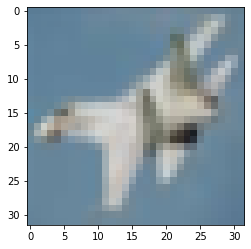

torch.Size([3, 32, 32])
0


In [ ]:
from torchvision import datasets, transforms

# use existing datasets
# Download and construct CIFAR-10 dataset.
val_dataset = datasets.CIFAR10(
    root='./data/', 
    train=False, 
    transform=transforms.ToTensor(), 
    download=True
)

# Fetch one data pair (read data from disk).
image, label = val_dataset[10]
import matplotlib.pyplot as plt
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()
print(image.shape)
print(label)

In [ ]:
from torch.utils.data import DataLoader
# Data loader (this provides queues and threads in a very simple way).
loader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=64, 
    shuffle=True
)

# how data is loaded in the backend
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(loader)
# Mini-batch images and labels.
images, labels = data_iter.next()
print(images.shape, labels.shape)

# Usage of the data loader is as below.
for images, labels in loader:
    # Training code should be written here.
    print(images.shape, labels.shape)
    break

torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])


In [ ]:
from torch.utils.data import Dataset

# Defining a custom dataset
class CustomDataset(Dataset):
    def __init__(self):
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        return None
    def __len__(self):
        # return length of the dataset
        return 0 # here 0 because there are no elements

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
custom_loader = torch.utils.data.DataLoader(
    dataset=custom_dataset,
    batch_size=64, 
    shuffle=True
)

ValueError: ignored

In [ ]:
# defining models

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # 1. initialize all the model layers (eg: nn.Linear(), nn.Conv2d(),etc)
        self.layer1 = nn.Linear(3, 3)

    def forward(self, inp):
        # 1. pass through the required layers and perform the necessary operations
        # eg: out = self.layer1(x)
        # return final output
        out = self.layer1(inp)
        return out

model = CustomModel().to(device)
inp = torch.randn((2, 3)).to(device)
output = model(inp)
print(output)

tensor([[ 0.8705, -0.6628, -0.8751],
        [ 0.2087, -0.4947, -0.0734]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [ ]:
# Save and load the entire model.
torch.save(model.state_dict(), 'model.ckpt')
model.load_state_dict(torch.load('model.ckpt'))

<All keys matched successfully>

## Linear regression (EXTREME OVERKILL CODE)

In [ ]:
# SUPER UNWANTEDLY LARGE LINEAR REGRESSION CODE (HOWEVER WILL GIVE U AN OVERALL IDEA SO YEAH)

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


class XYSet(Dataset):
    def __init__(self):
        # toy dataset
        data = np.genfromtxt("https://raw.githubusercontent.com/MukundVarmaT/PythonMLworkshop/master/data.csv", delimiter=",")
        self.x, self.y = data[:,[0]], data[:, [1]]
    def __getitem__(self, indx):
        return self.x[indx], self.y[indx]
    def __len__(self):
        return len(self.x)


class LinReg(nn.Module):
    def __init__(self):
        super(LinReg, self).__init__()
        self.layer = nn.Linear(1, 1)
    def forward(self, x):
        return self.layer(x)

dset = XYSet()
loader = DataLoader(dset, batch_size=8)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LinReg().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.000001)
criterion = nn.MSELoss()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def train(epochs):
    params = []
    for epoch in range(epochs):
        loss_cntr = []
        for x, y in loader:
            x, y = x.to(device).float(), y.to(device).float()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_cntr.append(loss.item())
        params.append((model.layer.weight.item(), model.layer.bias.item()))
        if epoch % 10 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, np.mean(loss_cntr)))
    return params

In [ ]:
# Train the model
params = train(100)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [1/100], Loss: 3155.4767
Epoch [11/100], Loss: 949.6550
Epoch [21/100], Loss: 342.2666
Epoch [31/100], Loss: 175.1840
Epoch [41/100], Loss: 129.3094
Epoch [51/100], Loss: 116.7594
Epoch [61/100], Loss: 113.3503
Epoch [71/100], Loss: 112.4370
Epoch [81/100], Loss: 112.1991
Epoch [91/100], Loss: 112.1408


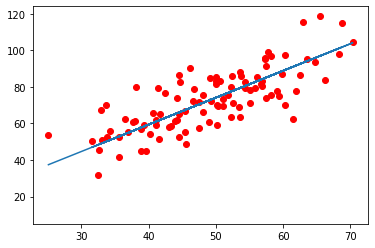

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
plt.plot(dset.x, dset.y, 'ro', label='Original data')
fit_line, = plt.plot(dset.x, params[0][0]*dset.x + params[0][1], label='Fitted line')

def animate(i):
    fit_line.set_data(dset.x, params[i][0]*dset.x + params[i][1])
    return fit_line,

line_anim = animation.FuncAnimation(fig, animate, frames=np.arange(0, 100, 1), interval=10, blit=True, repeat=True)
line_anim.save('nn.mp4', fps=10)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('nn.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)